In [275]:
# below is the API I used to access data from the St Louis Fred:
# https://github.com/mortada/fredapi
# https://mortada.net/python-api-for-fred.html

import requests
import datetime
import matplotlib.pyplot as plt
from fredapi import Fred
from config import fred_key
fred = Fred(api_key = fred_key)

In [115]:
import pandas as pd
import matplotlib as plt

In [276]:
# changes the formatting of floats to be percentages with 1 d.p.
pd.options.display.float_format = '{0:.1f}%'.format

# this gets the unemployment rate in the USA (figures monthly)
unemployment_data = fred.get_series('UNRATE')
unemployment_data.tail()

2019-07-01   3.7%
2019-08-01   3.7%
2019-09-01   3.5%
2019-10-01   3.6%
2019-11-01   3.5%
dtype: float64

In [277]:
unemployment_data_df = pd.DataFrame(unemployment_data).reset_index()
unemployment_data_df.columns = ['Date', 'Unemployment_Rate']
unemployment_data_df

,Date,Unemployment_Rate
0,1948-01-01,3.4%
1,1948-02-01,3.8%
2,1948-03-01,4.0%
3,1948-04-01,3.9%
4,1948-05-01,3.5%
...,...,...
858,2019-07-01,3.7%
859,2019-08-01,3.7%
860,2019-09-01,3.5%
861,2019-10-01,3.6%


In [278]:
unemployment_data_df['Date'] = [time.date() for time in unemployment_data_df['Date']]
unemployment_data_df

,Date,Unemployment_Rate
0,1948-01-01,3.4%
1,1948-02-01,3.8%
2,1948-03-01,4.0%
3,1948-04-01,3.9%
4,1948-05-01,3.5%
...,...,...
858,2019-07-01,3.7%
859,2019-08-01,3.7%
860,2019-09-01,3.5%
861,2019-10-01,3.6%


In [279]:
unemployment_data_df.dtypes

Date                  object
Unemployment_Rate    float64
dtype: object

In [280]:
unemployment_data_df['Date'].dtype

dtype('O')

In [281]:
unemployment_data_df['Unemployment_Rate'].dtype

dtype('float64')

In [282]:
unemployment_data_df['Date'] = unemployment_data_df['Date'].astype('datetime64[ns]')
unemployment_data_df

,Date,Unemployment_Rate
0,1948-01-01,3.4%
1,1948-02-01,3.8%
2,1948-03-01,4.0%
3,1948-04-01,3.9%
4,1948-05-01,3.5%
...,...,...
858,2019-07-01,3.7%
859,2019-08-01,3.7%
860,2019-09-01,3.5%
861,2019-10-01,3.6%


In [283]:
unemployment_data_df['Date'].dtype

dtype('<M8[ns]')

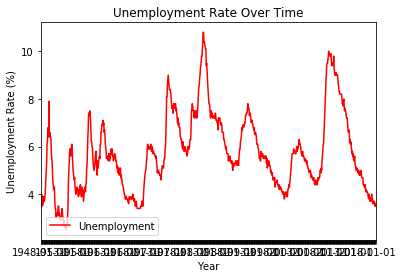

In [284]:
# CREATE CHART!!!
# ax = plt.subplot(111)
fig, ax = plt.subplots()

# Set the x axis
x_axis = unemployment_data_df['Date']
y_axis = unemployment_data_df['Unemployment_Rate']

# Set the plot title and axes titles
plt.title("Unemployment Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")

# Plot the 'mean' list vs. the established x axis with error 
# ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
# ax.plot(x_axis, inf_survrate, color="red", label="Infubinol")
# ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril")
ax.plot(x_axis, y_axis, color="red", label="Unemployment")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 60) != 0:
        t.set_visible(False)
# ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

# save the figure
plt.savefig("Figures/Unemployment_Rate.png")

# Show the resulting scatter plot
plt.show()

In [285]:
unemployment_data_df_annually = unemployment_data_df.groupby(unemployment_data_df.Date.dt.year).mean()
pd.options.display.float_format = '{0:.1f}%'.format
unemployment_data_df_annually

,Unemployment_Rate
Date,
1948,3.8%
1949,6.0%
1950,5.2%
1951,3.3%
1952,3.0%
...,...
2015,5.3%
2016,4.9%
2017,4.4%


In [286]:
# now can no longer get the name of the column 'Date' now that we've grouped by it, so we have to use '.index'
unemployment_data_df_annually.index

Int64Index([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
            1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
            1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Date')

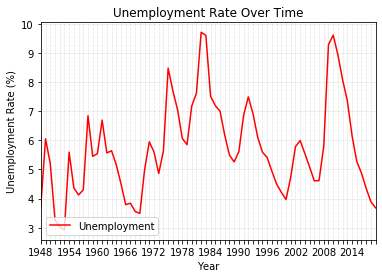

In [290]:
# CREATE CHART!!!
fig, ax = plt.subplots()

# Set the x axis
x_axis = unemployment_data_df_annually.index
y_axis = unemployment_data_df_annually['Unemployment_Rate']

# Set the plot title and axes titles
plt.title("Unemployment Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")

# Plot the 'mean' list vs. the established x axis with error 
# ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
# ax.plot(x_axis, inf_survrate, color="red", label="Infubinol")
# ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril")
ax.plot(x_axis, y_axis, color="red", label="Unemployment")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 6) != 0:
        t.set_visible(False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

# save the figure
plt.savefig("Figures/Unemployment_Rate_Annually.png")

# Show the resulting scatter plot
plt.show()

In [291]:
# this gets the real, median household income of citizens in the USA (figures annual)
med_income = fred.get_series('MEHOINUSA672N')
# Format with currency style
pd.options.display.float_format = '${:,.0f}'.format
med_income.tail()

2014-01-01   $56,969
2015-01-01   $59,901
2016-01-01   $61,779
2017-01-01   $62,626
2018-01-01   $63,179
dtype: float64

In [292]:
med_income_df = pd.DataFrame(med_income).reset_index()
med_income_df.columns = ['Date', 'Median_Income']
med_income_df['Date'] = pd.to_datetime(med_income_df['Date'])
# Format with currency style
# med_income.style.format({"Date":"${:,.2f}",
#                                "Median_Income":"${:,.1f}"})
med_income_df

,Date,Median_Income
0,1984-01-01,"$51,742"
1,1985-01-01,"$52,709"
2,1986-01-01,"$54,608"
3,1987-01-01,"$55,260"
4,1988-01-01,"$55,716"
5,1989-01-01,"$56,678"
6,1990-01-01,"$55,952"
7,1991-01-01,"$54,318"
8,1992-01-01,"$53,897"
9,1993-01-01,"$53,610"


In [293]:
# print(type(med_income_df['Date']))
med_income_df['Date'].dtype

dtype('<M8[ns]')

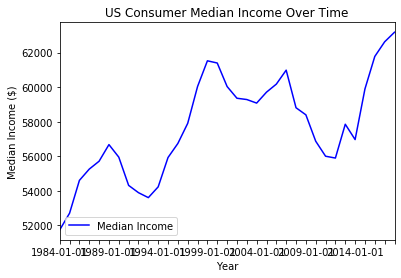

In [294]:
# CREATE CHART!!!
fig, ax = plt.subplots()

# Set the x axis
x_axis = med_income_df['Date']
y_axis = med_income_df['Median_Income']

# Set the plot title and axes titles
plt.title("US Consumer Median Income Over Time")
plt.xlabel("Year")
plt.ylabel("Median Income ($)")

# Plot the 'mean' list vs. the established x axis with error 
# ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
# ax.plot(x_axis, inf_survrate, color="red", label="Infubinol")
# ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril")
ax.plot(x_axis, y_axis, color="blue", label="Median Income")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
# ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

# save the figure
plt.savefig("Figures/Median_Income.png")

# Show the resulting scatter plot
plt.show()

In [295]:
med_income_df_annually = med_income_df.groupby(med_income_df.Date.dt.year).mean()
pd.options.display.float_format = '${:,.0f}'.format
med_income_df_annually

,Median_Income
Date,
1984,"$51,742"
1985,"$52,709"
1986,"$54,608"
1987,"$55,260"
1988,"$55,716"
1989,"$56,678"
1990,"$55,952"
1991,"$54,318"
1992,"$53,897"


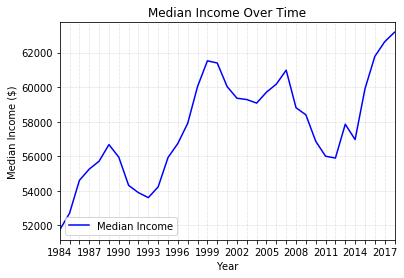

In [298]:
# CREATE CHART!!!
fig, ax = plt.subplots()

# Set the x axis
x_axis = med_income_df_annually.index
y_axis = med_income_df_annually['Median_Income']

# Set the plot title and axes titles
plt.title("Median Income Over Time")
plt.xlabel("Year")
plt.ylabel("Median Income ($)")

# Plot the 'mean' list vs. the established x axis with error 
# ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
# ax.plot(x_axis, inf_survrate, color="red", label="Infubinol")
# ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril")
ax.plot(x_axis, y_axis, color="blue", label="Median Income")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 3) != 0:
        t.set_visible(False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

# save the figure
plt.savefig("Figures/Median_Income_Annually.png")

# Show the resulting scatter plot
plt.show()

In [299]:
# the following percentages represent the percentage of loans that are 90 days + past due as a percentage of total loans
# (figures quarterly...), figures just from US commercial banks
ninety_plus_due_percent = fred.get_series('NPTLTL')
pd.options.display.float_format = '{0:.1f}%'.format
ninety_plus_due_percent.tail()

2018-07-01   1.0%
2018-10-01   0.9%
2019-01-01   0.9%
2019-04-01   0.9%
2019-07-01   0.9%
dtype: float64

In [300]:
ninety_plus_due_percent_df = pd.DataFrame(ninety_plus_due_percent).reset_index()
ninety_plus_due_percent_df.columns = ['Date', 'Percent_Delinquent']
ninety_plus_due_percent_df

,Date,Percent_Delinquent
0,1988-01-01,3.5%
1,1988-04-01,3.3%
2,1988-07-01,3.3%
3,1988-10-01,3.0%
4,1989-01-01,3.0%
...,...,...
122,2018-07-01,1.0%
123,2018-10-01,0.9%
124,2019-01-01,0.9%
125,2019-04-01,0.9%


In [301]:
unemployment_data_df.to_csv("unemployment_rate.csv")
unemployment_data_df_quarterly.to_csv("Clean_CSV_Folder/Unemployment_Rate_Annually.csv")

In [302]:
med_income_df.to_csv("med_income.csv")
med_income_df_annually.to_csv("Clean_CSV_Folder/Median_Income_Annually.csv")

In [303]:
ninety_plus_due_percent_df.to_csv("ninety_plus_due_percent.csv")

In [304]:
# File to Load for the delinquency rates...
delinquent_csv = "New_Seriously_Delinquent_90_Days_Plus_Percentages.csv"
# Read the Data file
delinquent_df = pd.read_csv(delinquent_csv)
delinquent_df.head()

C:\Users\jon10\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL,Unnamed: 8,New Seriously Delinquent* Balances by Loan Type,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,03:Q1,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%,nan%,Percent,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
1,03:Q2,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%,nan%,*90 or more days delinquent,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2,03:Q3,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
3,03:Q4,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
4,04:Q1,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


In [305]:
delinquent_df = delinquent_df.rename(columns={"Unnamed: 0": "Quarter"})
delinquent_df

,Quarter,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL,Unnamed: 8,New Seriously Delinquent* Balances by Loan Type,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,03:Q1,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%,nan%,Percent,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
1,03:Q2,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%,nan%,*90 or more days delinquent,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2,03:Q3,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
3,03:Q4,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
4,04:Q1,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16397,NaN,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
16398,NaN,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
16399,NaN,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
16400,NaN,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


In [306]:
dropped_delinquent_df = delinquent_df.drop(delinquent_df.index[67:])
dropped_delinquent_df

,Quarter,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL,Unnamed: 8,New Seriously Delinquent* Balances by Loan Type,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,03:Q1,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%,nan%,Percent,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
1,03:Q2,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%,nan%,*90 or more days delinquent,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2,03:Q3,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
3,03:Q4,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
4,04:Q1,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,18:Q3,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
63,18:Q4,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
64,19:Q1,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
65,19:Q2,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%,nan%,NaN,...,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


In [307]:
column_dropped_delinquent_df = dropped_delinquent_df.drop(dropped_delinquent_df.columns[8:], axis=1)
column_dropped_delinquent_df

,Quarter,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL
0,03:Q1,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%
1,03:Q2,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%
2,03:Q3,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%
3,03:Q4,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%
4,04:Q1,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%
...,...,...,...,...,...,...,...,...
62,18:Q3,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%
63,18:Q4,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%
64,19:Q1,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%
65,19:Q2,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%


In [308]:
column_dropped_delinquent_df[['Quarter', 'Year']] = column_dropped_delinquent_df['Quarter'].str.split(':', expand=True)

In [309]:
column_dropped_delinquent_df

,Quarter,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL,Year
0,03,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%,Q1
1,03,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%,Q2
2,03,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%,Q3
3,03,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%,Q4
4,04,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%,Q1
...,...,...,...,...,...,...,...,...,...
62,18,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%,Q3
63,18,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%,Q4
64,19,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%,Q1
65,19,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%,Q2


In [310]:
column_dropped_delinquent_df['Year'][column_dropped_delinquent_df['Year'] == 'Q1'] = '/03/31'
column_dropped_delinquent_df['Year'][column_dropped_delinquent_df['Year'] == 'Q2'] = '/06/30'
column_dropped_delinquent_df['Year'][column_dropped_delinquent_df['Year'] == 'Q3'] = '/09/30'
column_dropped_delinquent_df['Year'][column_dropped_delinquent_df['Year'] == 'Q4'] = '/12/31'
column_dropped_delinquent_df

C:\Users\jon10\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jon10\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jon10\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thi

,Quarter,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL,Year
0,03,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%,/03/31
1,03,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%,/06/30
2,03,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%,/09/30
3,03,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%,/12/31
4,04,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%,/03/31
...,...,...,...,...,...,...,...,...,...
62,18,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%,/09/30
63,18,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%,/12/31
64,19,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%,/03/31
65,19,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%,/06/30


In [311]:
column_dropped_delinquent_df.dtypes

Quarter          object
AUTO            float64
CC              float64
MORTGAGE        float64
HELOC           float64
STUDENT LOAN    float64
OTHER           float64
ALL             float64
Year             object
dtype: object

In [312]:
column_dropped_delinquent_df['Quarter'].astype('str')

0     03
1     03
2     03
3     03
4     04
      ..
62    18
63    18
64    19
65    19
66    19
Name: Quarter, Length: 67, dtype: object

In [313]:
list_anything = []
for i in column_dropped_delinquent_df['Quarter']:
    i = '20' + i
    list_anything.append(i)
column_dropped_delinquent_df['Quarter'] = list_anything
column_dropped_delinquent_df

,Quarter,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL,Year
0,2003,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%,/03/31
1,2003,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%,/06/30
2,2003,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%,/09/30
3,2003,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%,/12/31
4,2004,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%,/03/31
...,...,...,...,...,...,...,...,...,...
62,2018,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%,/09/30
63,2018,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%,/12/31
64,2019,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%,/03/31
65,2019,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%,/06/30


In [314]:
column_dropped_delinquent_df['Quarter'] = column_dropped_delinquent_df['Quarter'] + column_dropped_delinquent_df['Year']

In [315]:
column_dropped_delinquent_df

,Quarter,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL,Year
0,2003/03/31,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%,/03/31
1,2003/06/30,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%,/06/30
2,2003/09/30,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%,/09/30
3,2003/12/31,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%,/12/31
4,2004/03/31,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%,/03/31
...,...,...,...,...,...,...,...,...,...
62,2018/09/30,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%,/09/30
63,2018/12/31,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%,/12/31
64,2019/03/31,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%,/03/31
65,2019/06/30,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%,/06/30


In [316]:
fresh_delinquent_df = column_dropped_delinquent_df.drop(['Year'], axis=1)
fresh_delinquent_df

,Quarter,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,ALL
0,2003/03/31,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%
1,2003/06/30,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%
2,2003/09/30,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%
3,2003/12/31,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%
4,2004/03/31,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%
...,...,...,...,...,...,...,...,...
62,2018/09/30,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%
63,2018/12/31,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%
64,2019/03/31,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%
65,2019/06/30,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%


In [317]:
delinquent_df_ = fresh_delinquent_df.rename(columns={"Quarter": "Date", "CC": "CREDIT_CARD", "STUDENT LOAN": "STUDENT_LOAN"})
delinquent_df_

,Date,AUTO,CREDIT_CARD,MORTGAGE,HELOC,STUDENT_LOAN,OTHER,ALL
0,2003/03/31,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%
1,2003/06/30,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%
2,2003/09/30,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%
3,2003/12/31,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%
4,2004/03/31,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%
...,...,...,...,...,...,...,...,...
62,2018/09/30,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%
63,2018/12/31,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%
64,2019/03/31,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%
65,2019/06/30,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%


In [318]:
delinquent_df_['Date'] = delinquent_df_['Date'].astype('datetime64[ns]')
delinquent_df_

,Date,AUTO,CREDIT_CARD,MORTGAGE,HELOC,STUDENT_LOAN,OTHER,ALL
0,2003-03-31,2.2%,8.3%,1.4%,0.8%,5.6%,4.8%,2.5%
1,2003-06-30,2.2%,8.4%,1.5%,0.8%,5.6%,5.0%,2.6%
2,2003-09-30,2.1%,8.2%,1.5%,0.7%,5.7%,5.1%,2.5%
3,2003-12-31,2.0%,8.1%,1.4%,0.5%,5.7%,4.9%,2.4%
4,2004-03-31,2.0%,7.8%,1.3%,0.4%,5.8%,5.0%,2.3%
...,...,...,...,...,...,...,...,...
62,2018-09-30,2.3%,4.8%,1.2%,1.0%,9.1%,4.9%,2.4%
63,2018-12-31,2.4%,5.0%,1.2%,0.8%,8.9%,4.9%,2.4%
64,2019-03-31,2.4%,5.0%,1.1%,0.8%,9.4%,4.9%,2.4%
65,2019-06-30,2.3%,5.2%,1.0%,0.7%,9.9%,4.8%,2.4%


In [319]:
delinquent_df_.dtypes

Date            datetime64[ns]
AUTO                   float64
CREDIT_CARD            float64
MORTGAGE               float64
HELOC                  float64
STUDENT_LOAN           float64
OTHER                  float64
ALL                    float64
dtype: object

In [320]:
delinquent_df_annually = delinquent_df_.groupby(delinquent_df_.Date.dt.year).mean()
delinquent_df_annually

,AUTO,CREDIT_CARD,MORTGAGE,HELOC,STUDENT_LOAN,OTHER,ALL
Date,,,,,,,
2003,2.1%,8.2%,1.5%,0.7%,5.6%,4.9%,2.5%
2004,1.8%,7.3%,1.3%,0.4%,5.7%,5.0%,2.2%
2005,1.7%,6.3%,1.3%,0.4%,6.9%,4.2%,2.0%
2006,1.9%,5.6%,1.4%,0.6%,7.3%,3.9%,2.0%
2007,2.4%,6.5%,2.7%,1.3%,7.9%,4.1%,3.1%
2008,3.0%,7.9%,5.7%,3.2%,7.5%,5.9%,5.6%
2009,3.4%,10.3%,8.1%,4.8%,7.6%,7.8%,7.7%
2010,2.7%,10.2%,6.7%,3.5%,8.5%,7.0%,6.6%
2011,1.8%,6.8%,4.8%,2.9%,8.8%,5.3%,4.9%


In [321]:
delinquent_df_annually.to_csv("Clean_CSV_Folder/Delinquent_Loan_Rates_Annually.csv")

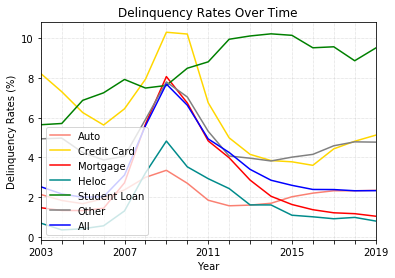

In [322]:
# CREATE CHART!!!
fig, ax = plt.subplots()

# Set the x axis
x_axis = delinquent_df_annually.index
# y_axis = delinquent_df_annually['Median_Income']

# Set the plot title and axes titles
plt.title("Delinquency Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Delinquency Rates (%)")

# Plot the 'mean' list vs. the established x axis with error 
# ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
# ax.plot(x_axis, inf_survrate, color="red", label="Infubinol")
# ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril")
ax.plot(x_axis, delinquent_df_annually['AUTO'], color="salmon", label="Auto")
ax.plot(x_axis, delinquent_df_annually['CREDIT_CARD'], color="gold", label="Credit Card")
ax.plot(x_axis, delinquent_df_annually['MORTGAGE'], color="red", label="Mortgage")
ax.plot(x_axis, delinquent_df_annually['HELOC'], color="darkcyan", label="Heloc")
ax.plot(x_axis, delinquent_df_annually['STUDENT_LOAN'], color="green", label="Student Loan")
ax.plot(x_axis, delinquent_df_annually['OTHER'], color="grey", label="Other")
ax.plot(x_axis, delinquent_df_annually['ALL'], color="blue", label="All")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 4) != 0:
        t.set_visible(False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

# save the figure
plt.savefig("Figures/Delinquency_Rates_Annually.png")

# Show the resulting scatter plot
plt.show()